# AIML-CLUB-IIITNR
## SESSION - 3 PANDAS

**Tools - pandas**

*The `pandas` library provides high-performance, easy-to-use data structures and data analysis tools. The main data structure is the `DataFrame`, which you can think of as an in-memory 2D table (like a spreadsheet, with column names and row labels). Many features available in Excel are available programmatically, such as creating pivot tables, computing columns based on other columns, plotting graphs, etc. You can also group rows by column value, or join tables much like in SQL. Pandas is also great at handling time series.*

Prerequisites:
* NumPy – basics

# Setup

First, let's import `pandas`. People usually import it as `pd`:

In [2]:
import pandas as pd

# `Series` objects
The `pandas` library contains these useful data structures:
* `Series` objects, that we will discuss now. A `Series` object is 1D array, similar to a column in a spreadsheet (with a column name and row labels).
* `DataFrame` objects. This is a 2D table, similar to a spreadsheet (with column names and row labels).
* `Panel` objects. You can see a `Panel` as a dictionary of `DataFrame`s. These are less used, so we will not discuss them here. but if u want to learn this: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Panel.html

## Creating a `Series`
Let's start by creating our first `Series` object!

In [8]:
s = pd.Series([2,-1,3,5])
s

0    2
1   -1
2    3
3    5
dtype: int64

## Similar to a 1D `ndarray`
`Series` objects behave much like one-dimensional NumPy `ndarray`s, and you can often pass them as parameters to NumPy functions:

In [4]:
import numpy as np
np.exp(s) 

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

Arithmetic operations on `Series` are also possible, and they apply *elementwise*, just like for `ndarray`s:

In [5]:
s + [1000,2000,3000,4000] 

0    1002
1    1999
2    3003
3    4005
dtype: int64

Similar to NumPy, if you add a single number to a `Series`, that number is added to all items in the `Series`. This is called * broadcasting*:

In [6]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

The same is true for all binary operations such as `*` or `/`, and even conditional operations:

In [9]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

## Index labels
Each item in a `Series` object has a unique identifier called the *index label*. By default, it is simply the rank of the item in the `Series` (starting at `0`) but you can also set the index labels manually:

In [11]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

You can then use the `Series` just like a `dict`:

In [13]:
s2["bob"]

83

You can still access the items by integer location, like in a regular array:

In [14]:
s2[1]

83

To make it clear when you are accessing by label or by integer location, it is recommended to always use the `loc` attribute when accessing by label, and the `iloc` attribute when accessing by integer location:

In [17]:
s2.loc['bob']

83

In [18]:
s2.iloc[1]

83

Slicing a `Series` also slices the index labels:

In [19]:
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

This can lead to unexpected results when using the default numeric labels, so be careful:

In [20]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [21]:
surprise_slice = surprise[2:]
surprise_slice  

2    1002
3    1003
dtype: int64

Oh look! The first element has index label `2`. The element with index label `0` is absent from the slice:

In [22]:
try:
    surprise_slice[0] 
except KeyError as e:
    print("Key error:", e) 

Key error: 0


But remember that you can access elements by integer location using the `iloc` attribute. This illustrates another reason why it's always better to use `loc` and `iloc` to access `Series` objects:

In [23]:
surprise_slice.iloc[0] 

1002

## Init from `dict`
You can create a `Series` object from a `dict`. The keys will be used as index labels:

In [24]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

You can control which elements you want to include in the `Series` and in what order by explicitly specifying the desired `index`:

In [25]:
s4 = pd.Series(weights, index = ["colin", "alice"])
s4

colin    86
alice    68
dtype: int64

## Automatic alignment
When an operation involves multiple `Series` objects, `pandas` automatically aligns items by matching index labels.

In [27]:
print(s2.keys())
print(s3.keys())

s2 + s3

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

The resulting `Series` contains the union of index labels from `s2` and `s3`. Since `"colin"` is missing from `s2` and `"charles"` is missing from `s3`, these items have a `NaN` result value. (ie. Not-a-Number means *missing*).

Automatic alignment is very handy when working with data that may come from various sources with varying structure and missing items. But if you forget to set the right index labels, you can have surprising results:

In [30]:
s5 = pd.Series([1000,1000,1000,1000])
print("s2 =", s2.values)
print("s5 =", s5.values)

s2 + s5

s2 = [ 68  83 112  68]
s5 = [1000 1000 1000 1000]


alice     NaN
bob       NaN
charles   NaN
darwin    NaN
0         NaN
1         NaN
2         NaN
3         NaN
dtype: float64

Pandas could not align the `Series`, since their labels do not match at all, hence the full `NaN` result.

## Init with a scalar
You can also initialize a `Series` object using a scalar and a list of index labels: all items will be set to the scalar.

In [31]:
meaning = pd.Series(42, ["life", "universe", "everything"]) 
meaning

life          42
universe      42
everything    42
dtype: int64

## `Series` name
A `Series` can have a `name`:

In [32]:
s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

## Plotting a `Series`
Pandas makes it easy to plot `Series` data using matplotlib (for more details on matplotlib, check out the [matplotlib tutorial](tools_matplotlib.ipynb)). Just import matplotlib and call the `plot()` method:

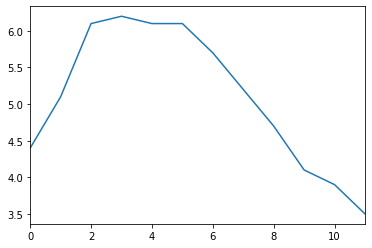

In [33]:
%matplotlib inline 
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot() 
plt.show()

There are *many* options for plotting your data. It is not necessary to list them all here: if you need a particular type of plot (histograms, pie charts, etc.), just look for it in the excellent [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html) section of pandas' documentation, and look at the example code.

# `DataFrame` objects
A DataFrame object represents a spreadsheet, with cell values, column names and row index labels. You can define expressions to compute columns based on other columns, create pivot-tables, group rows, draw graphs, etc. You can see `DataFrame`s as dictionaries of `Series`.

## Creating a `DataFrame`
You can create a DataFrame by passing a dictionary of `Series` objects:

In [35]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
} 
people = pd.DataFrame(people_dict)
people 

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


A few things to note:
* the `Series` were automatically aligned based on their index,
* missing values are represented as `NaN`,
* `Series` names are ignored (the name `"year"` was dropped),
* `DataFrame`s are displayed nicely in Jupyter notebooks, woohoo!

You can access columns pretty much as you would expect. They are returned as `Series` objects:

In [38]:
people["birthyear"] 

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

You can also get multiple columns at once:

In [39]:
people[["birthyear", "hobby"]] 

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


If you pass a list of columns and/or index row labels to the `DataFrame` constructor, it will guarantee that these columns and/or rows will exist, in that order, and no other column/row will exist. For example:

In [40]:
d2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
     )
d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


Another convenient way to create a `DataFrame` is to pass all the values to the constructor as an `ndarray`, or a list of lists, and specify the column names and row index labels separately:

In [41]:
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


Instead of an `ndarray`, you can also pass a `DataFrame` object:

In [42]:
d4 = pd.DataFrame(
         d3,
         columns=["hobby", "children"],
         index=["alice", "bob"]
     )
d4

,hobby,children
alice,Biking,NaN
bob,Dancing,3.0


It is also possible to create a `DataFrame` with a dictionary (or list) of dictionaries (or list):

In [43]:
people = pd.DataFrame({
    "birthyear": {"alice":1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice":"Biking", "bob": "Dancing"},
    "weight": {"alice":68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [44]:
#show transposing
people.T

,alice,bob,charles
birthyear,1985,1984,1992
hobby,Biking,Dancing,NaN
weight,68,83,112
children,NaN,3,0


## Sorting a `DataFrame`
You can sort a `DataFrame` by calling its `sort_index` method. By default it sorts the rows by their index label, in ascending order, but let's reverse the order:

In [45]:
people.sort_index(ascending=False) 

,birthyear,hobby,weight,children
charles,1992,NaN,112,0.0
bob,1984,Dancing,83,3.0
alice,1985,Biking,68,NaN


In [47]:
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


Note that `sort_index` returned a sorted *copy* of the `DataFrame`. To modify `people` directly, we can set the `inplace` argument to `True`. Also, we can sort the columns instead of the rows by setting `axis=1`:

In [48]:
people.sort_index(axis=1, inplace=True)
people 

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


To sort the `DataFrame` by the values instead of the labels, we can use `sort_values` and specify the column to sort by:

In [49]:
people.sort_values(by="birthyear", inplace=True)
people

,birthyear,children,hobby,weight
bob,1984,3.0,Dancing,83
alice,1985,NaN,Biking,68
charles,1992,0.0,NaN,112


## Operations on `DataFrame`s
Although `DataFrame`s do not try to mimick NumPy arrays, there are a few similarities. Let's create a `DataFrame` to demonstrate this:

In [50]:
grades_array = np.array([[8,8,9],[10,9,9],[4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice","bob","charles","darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


You can apply NumPy mathematical functions on a `DataFrame`: the function is applied to all values:

In [51]:
np.sqrt(grades)

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


Similarly, adding a single value to a `DataFrame` will add that value to all elements in the `DataFrame`. This is called *broadcasting*:

In [52]:
grades + 1

,sep,oct,nov
alice,9,9,10
bob,11,10,10
charles,5,9,3
darwin,10,11,11


Of course, the same is true for all other binary operations, including arithmetic (`*`,`/`,`**`...) and conditional (`>`, `==`...) operations:

In [53]:
grades >= 5 

,sep,oct,nov
alice,True,True,True
bob,True,True,True
charles,False,True,False
darwin,True,True,True


Aggregation operations, such as computing the `max`, the `sum` or the `mean` of a `DataFrame`, apply to each column, and you get back a `Series` object:

In [54]:
grades.mean() 

sep    7.75
oct    8.75
nov    7.50
dtype: float64

The `all` method is also an aggregation operation: it checks whether all values are `True` or not. Let's see during which months all students got a grade greater than `5`:

In [55]:
(grades > 5).all() 

sep    False
oct     True
nov    False
dtype: bool

Most of these functions take an optional `axis` parameter which lets you specify along which axis of the `DataFrame` you want the operation executed. The default is `axis=0`, meaning that the operation is executed vertically (on each column). You can set `axis=1` to execute the operation horizontally (on each row). For example, let's find out which students had all grades greater than `5`:

In [56]:
(grades > 5).all(axis = 1)

alice       True
bob         True
charles    False
darwin      True
dtype: bool

The `any` method returns `True` if any value is True. Let's see who got at least one grade 10:

In [57]:
(grades == 10).any(axis = 1)

alice      False
bob         True
charles    False
darwin      True
dtype: bool

If you add a `Series` object to a `DataFrame` (or execute any other binary operation), pandas attempts to broadcast the operation to all *rows* in the `DataFrame`. This only works if the `Series` has the same size as the `DataFrame`s rows. For example, let's substract the `mean` of the `DataFrame` (a `Series` object) from the `DataFrame`:

In [58]:
grades - grades.mean()  # equivalent to: grades - [7.75, 8.75, 7.50]  

,sep,oct,nov
alice,0.25,-0.75,1.5
bob,2.25,0.25,1.5
charles,-3.75,-0.75,-5.5
darwin,1.25,1.25,2.5


In [60]:
#loading titanic dataset
df_titanic = pd.read_csv('titanic.csv') 
df_titanic.tail() 

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.00,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.00,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.45,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.00,C148,C,1
890,891,"Dooley, Mr. Patrick",3,male,32.0,0,0,370376,7.75,NaN,Q,0


In [61]:
df_titanic.isna().sum() 

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [62]:
df_titanic_1 = df_titanic.copy()
df_titanic_1.head()  

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


Looks like the addition worked in some cases but way too many elements are now empty. That's because when aligning the `DataFrame`s, some columns and rows were only present on one side, and thus they were considered missing on the other side (`NaN`). Then adding `NaN` to a number results in `NaN`, hence the result.

## Handling missing data
Dealing with missing data is a frequent task when working with real life data. Pandas offers a few tools to handle missing data.
 
Let's try to fix the problem above. For example, we can decide that missing data should result in a zero, instead of `NaN`. We can replace all `NaN` values by a any value using the `fillna()` method:

In [63]:
mean_age = df_titanic['Age'].mean()
mean_age

29.69911764705882

In [64]:
#filling nan value
df_titanic_1['Age'] = df_titanic_1['Age'].fillna(mean_age)
df_titanic_1.isna().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [65]:
df_titanic.shape

(891, 12)

In [66]:
df_titanic_2 = df_titanic.copy()
df_titanic_2.shape

(891, 12)

In [67]:
df_titanic_2 = df_titanic_2.drop(['Cabin'], axis=1)
df_titanic_2.shape

(891, 11)

In [68]:
df_titanic_2.isna().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Survived         0
dtype: int64

In [69]:
#drop nan value
df_titanic_2 = df_titanic_2.dropna()
df_titanic_2.shape

(712, 11)

In [70]:
df_titanic_2.isna().sum() 

PassengerId    0
Name           0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

## Aggregating with `groupby`
pandas allows grouping your data into groups to run calculations over each group.

In [71]:
#groupby
df_titanic_2[['Age','Sex']].groupby(['Sex']).mean()  

,Age
Sex,
female,27.745174
male,30.726645


Finally, the `describe()` method gives a nice overview of the main aggregated values over each column:
* `count`: number of non-null (not NaN) values
* `mean`: mean of non-null values
* `std`: [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of non-null values
* `min`: minimum of non-null values
* `25%`, `50%`, `75%`: 25th, 50th and 75th [percentile](https://en.wikipedia.org/wiki/Percentile) of non-null values
* `max`: maximum of non-null values

In [72]:
df_titanic_2.describe() 

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,2.240169,29.642093,0.514045,0.432584,34.567251,0.404494
std,258.683191,0.836854,14.492933,0.930692,0.854181,52.938648,0.491139
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,1.000000,20.000000,0.000000,0.000000,8.050000,0.000000
50%,445.000000,2.000000,28.000000,0.000000,0.000000,15.645850,0.000000
75%,677.250000,3.000000,38.000000,1.000000,1.000000,33.000000,1.000000
max,891.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000


# dummies in pandas
when we have to convert categorical variables from string to numerical value.

In [73]:
dummies = pd.get_dummies(df_titanic_2['Sex'])
print(dummies.shape)
dummies.head()   

(712, 2)


,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [74]:
df_titanic_3 = pd.concat([df_titanic_2, dummies],axis=1)
print(df_titanic_3.shape)
df_titanic_3.head()  

(712, 13)


,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,female,male
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C,1,1,0
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,S,1,1,0
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,S,0,0,1


In [75]:
#saving dataframe
df_titanic_3.to_csv("df_titanic_3.csv") 